In [1]:
# all the imports
import os
import tempfile
from subprocess import call
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pims import ImageSequence
import zipfile
from skxray import dpc
%matplotlib notebook

dpc.logger.setLevel(dpc.logging.DEBUG)

In [2]:
# some helper functions
def load_image(filename):
    """
    Load an image

    Parameters
    ----------
    filename : string
        the location and name of an image

    Return
    ----------
    t : 2-D numpy array
        store the image data

    """

    if os.path.exists(filename):
        t = plt.imread(filename)

    else:
        print('Please download and decompress the test data to your home directory\n\
               Google drive link, https://drive.google.com/file/d/0B3v6W1bQwN_AVjdYdERHUDBsMmM/edit?usp=sharing\n\
               Dropbox link, https://www.dropbox.com/s/963c4ymfmbjg5dm/SOFC.zip')
        raise Exception('File not found: %s' % filename)

    return t


def unzip(source_filename, path=None, verbose=True):
    with zipfile.ZipFile(source_filename) as zf:
        num = len(zf.infolist())
        for idx, member in enumerate(zf.infolist()):
            if verbose and idx % (num//100) == 0:
                print("{:3d}% Extracting {}/{}".format(
                      int(idx/num*100), idx+1, len(zf.infolist())))
            zf.extract(member, path)

In [3]:
# ONLY RUN THIS CELL ONCE, PLEASE! If you need to reset the notebook, set the 
# `download_folder` variable to the output of this cell...
download_folder = tempfile.mkdtemp()
print('download_folder')

In [4]:
# Download and unzip the data file to a temporary location
dpc_zip_file = os.path.join(download_folder, 'SOFC.zip')
dpc_zip_folder = os.path.join(download_folder, 'SOFC')

zip_downloaded = True
zip_extracted = True
# check to see if the zip file has already been downloaded
if not os.path.exists(download_folder + '/SOFC.zip'):
    print('Zip file has not been downloaded')
    download_exists = False
else:
    print("Zip file has already been downloaded to %s" % dpc_zip_file)

# see if the zip has been extracted already
if not os.path.exists(download_folder + '/SOFC'):
    print('Zip file has not been extracted')
    zip_extracted = False
else:
    print("Zip file has already been extracted to %s." % dpc_zip_folder)

if not zip_extracted:
    if not zip_downloaded:
        print('Downloading zip file')
        # only download the data again if the zip file is not present
        sofc_file = os.path.join(download_folder, 'SOFC.zip')
        print('The required test data directory was not found.'
              '\nDownloading the test data to %s' % dpc_zip_file)
        # todo make this not print every fraction of a second
        call(('wget https://www.dropbox.com/s/963c4ymfmbjg5dm/SOFC.zip -P %s' %
              download_folder),
             shell=True)
    # unzip it into this directory
    print('Unzipping data')
    unzip(dpc_zip_file, download_folder)

Zip file has already been downloaded to /tmp/tmp_Uf7w7/SOFC.zip
Zip file has already been extracted to /tmp/tmp_Uf7w7/SOFC.


In [5]:
# Set parameters
start_point = [1, 0]
first_image = 1
pixel_size = (55, 55)
focus_to_det = 1.46e6
scan_xstep = 0.1
scan_ystep = 0.1
scan_rows = 121
scan_cols = 121
energy = 19.5
roi = None
padding = 0
weighting = 1.
bad_pixels = None
solver = 'Nelder-Mead'
images = ImageSequence(dpc_zip_folder + "/*.tif")
img_size = images[0].shape
ref_image = np.ones(img_size)
scale = True
negate = True

In [6]:
# Use skxray.dpc.dpc_runner
phase, amplitude = dpc.dpc_runner(
    ref_image, images, start_point, pixel_size, focus_to_det, scan_rows,
    scan_cols, scan_xstep, scan_ystep, energy, padding, weighting, solver,
    roi, bad_pixels, negate, scale)

DEBUG:skxray.dpc:  0% 1 of 14641
DEBUG:skxray.dpc:  0% 147 of 14641
DEBUG:skxray.dpc:  1% 293 of 14641
DEBUG:skxray.dpc:  2% 439 of 14641
DEBUG:skxray.dpc:  3% 585 of 14641
DEBUG:skxray.dpc:  4% 731 of 14641
DEBUG:skxray.dpc:  5% 877 of 14641
DEBUG:skxray.dpc:  6% 1023 of 14641
DEBUG:skxray.dpc:  7% 1169 of 14641
DEBUG:skxray.dpc:  8% 1315 of 14641
DEBUG:skxray.dpc:  9% 1461 of 14641
DEBUG:skxray.dpc: 10% 1607 of 14641
DEBUG:skxray.dpc: 11% 1753 of 14641
DEBUG:skxray.dpc: 12% 1899 of 14641
DEBUG:skxray.dpc: 13% 2045 of 14641
DEBUG:skxray.dpc: 14% 2191 of 14641
DEBUG:skxray.dpc: 15% 2337 of 14641
DEBUG:skxray.dpc: 16% 2483 of 14641
DEBUG:skxray.dpc: 17% 2629 of 14641
DEBUG:skxray.dpc: 18% 2775 of 14641
DEBUG:skxray.dpc: 19% 2921 of 14641
DEBUG:skxray.dpc: 20% 3067 of 14641
DEBUG:skxray.dpc: 21% 3213 of 14641
DEBUG:skxray.dpc: 22% 3359 of 14641
DEBUG:skxray.dpc: 23% 3505 of 14641
DEBUG:skxray.dpc: 24% 3651 of 14641
DEBUG:skxray.dpc: 25% 3797 of 14641
DEBUG:skxray.dpc: 26% 3943 of 14641
D

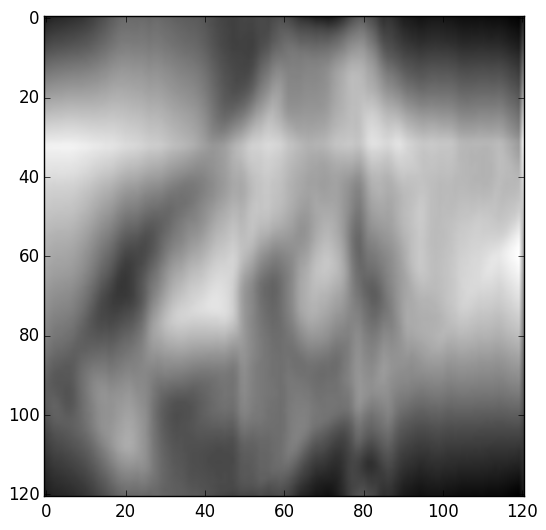

In [14]:
# display results
plt.imshow(phase, cmap='gray')
plt.gcf()

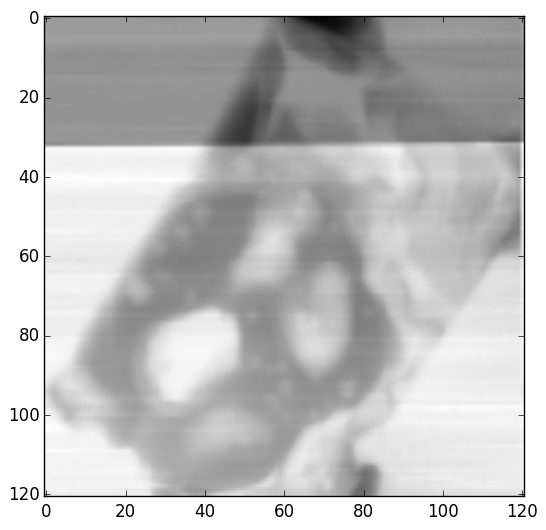

In [13]:
plt.imshow(amplitude, cmap='gray')
plt.gcf()